<a href="https://colab.research.google.com/github/O-Kpy/Kaggle/blob/main/2017_kaggle_survey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
%config inLineBackend.figure_format = 'retina' 
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from pywaffle import Waffle
import plotly.graph_objects as go

In [2]:
pip install pywaffle

     |████████████████████████████████| 532kB 6.8MB/s 


In [ ]:
!pip install plotly.express

In [95]:
!pip install --upgrade plotly

     |████████████████████████████████| 13.2MB 263kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


#  Kaggle ver 2017


--------------------------------------------------------------------------------
Kaggle에서 실시한 Survey로 만든 데이터셋이다.


모델링과 성능평가는 할수 없지만, 클리닝(Cleaning)과 시각화(visualization)을 시도한다.



1.   데이터 탑재
2.   데이터 형태 확인
3.   데이터 결측치와 이상값(Outlier)를 확인하고 처리
4.   데이터 시각화(visualization)

**데이터의 columns 들이 question이다. rows들이 개개인 답변**


In [3]:
data = pd.read_csv('/content/drive/MyDrive/dataset/kaggle/kaggle survey/2017/multipleChoiceResponses.csv', encoding='ISO-8859-1')

In [ ]:
data.shape

(16716, 228)

In [ ]:
data.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,PublicDatasetsSelect,LearningPlatformSelect,LearningPlatformUsefulnessArxiv,LearningPlatformUsefulnessBlogs,LearningPlatformUsefulnessCollege,LearningPlatformUsefulnessCompany,LearningPlatformUsefulnessConferences,LearningPlatformUsefulnessFriends,LearningPlatformUsefulnessKaggle,LearningPlatformUsefulnessNewsletters,LearningPlatformUsefulnessCommunities,LearningPlatformUsefulnessDocumentation,LearningPlatformUsefulnessCourses,LearningPlatformUsefulnessProjects,LearningPlatformUsefulnessPodcasts,LearningPlatformUsefulnessSO,LearningPlatformUsefulnessTextbook,LearningPlatformUsefulnessTradeBook,LearningPlatformUsefulnessTutoring,LearningPlatformUsefulnessYouTube,BlogsPodcastsNewslettersSelect,LearningDataScienceTime,JobSkillImportanceBigData,JobSkillImportanceDegree,JobSkillImportanceStats,JobSkillImportanceEnterpriseTools,...,WorkChallengeFrequencyITCoordination,WorkChallengeFrequencyHiringFunds,WorkChallengeFrequencyPrivacy,WorkChallengeFrequencyScaling,WorkChallengeFrequencyEnvironments,WorkChallengeFrequencyClarity,WorkChallengeFrequencyDataAccess,WorkChallengeFrequencyOtherSelect,WorkDataVisualizations,WorkInternalVsExternalTools,WorkMLTeamSeatSelect,WorkDatasets,WorkDatasetsChallenge,WorkDataStorage,WorkDataSharing,WorkDataSourcing,WorkCodeSharing,RemoteWork,CompensationAmount,CompensationCurrency,SalaryChange,JobSatisfaction,JobSearchResource,JobHuntTime,JobFactorLearning,JobFactorSalary,JobFactorOffice,JobFactorLanguages,JobFactorCommute,JobFactorManagement,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,Employed by a company that doesn't perform adv...,SAS Base,Random Forests,F#,Dataset aggregator/platform (i.e. Socrata/Kagg...,"College/University,Conferences,Podcasts,Trade ...",NaN,NaN,NaN,NaN,Very useful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very useful,NaN,NaN,Somewhat useful,NaN,NaN,"Becoming a Data Scientist Podcast,Data Machina...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Often,Most of the time,NaN,NaN,NaN,NaN,26-50% of projects,Do not know,Standalone Team,NaN,NaN,Document-oriented (e.g. MongoDB/Elasticsearch)...,"Company Developed Platform,I don't typically s...",NaN,"Mercurial,Subversion,Other",Always,NaN,NaN,I am not currently employed,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,Random Forests,Python,Dataset aggregator/platform (i.e. Socrata/Kagg...,Kaggle,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat useful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Becoming a Data Scientist Podcast,Siraj Raval ...",1-2 years,NaN,Nice to have,Unnecessary,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Amazon Web services,Deep learning,R,Dataset aggregator/platform (i.e. Socrata/Kagg...,"Arxiv,College/University,Kaggle,Online courses...",Very useful,NaN,Somewhat useful,NaN,NaN,NaN,Somewhat useful,NaN,NaN,NaN,Very useful,NaN,NaN,NaN,NaN,NaN,NaN,Very useful,"FastML Blog,No Free Hunch Blog,Talking Machine...",1-2 years,Necessary,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Asking friends, family members, or former coll...",1-2,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Impor

데이터의 칼럼(columns) 수는 228개,

데이터의 행(rows)==(참여수)은 16716개

columns(Question)을 살펴보면 본인의 정보를 나타내는 col은 data[:,:3]이다.

**개인정보를 이용해 분포가 어떻게 되는지 시각화까지 해보겠다.**

In [4]:
data_copy = data.copy()

In [4]:
data_copy['GenderSelect'] = data_copy['GenderSelect'].apply(lambda x: 'ETC' if x not in ['Male', 'Female'] else x)
## male,female외에 'ETC'로 바꾸다

In [5]:
data_gender = data_copy['GenderSelect'].value_counts()

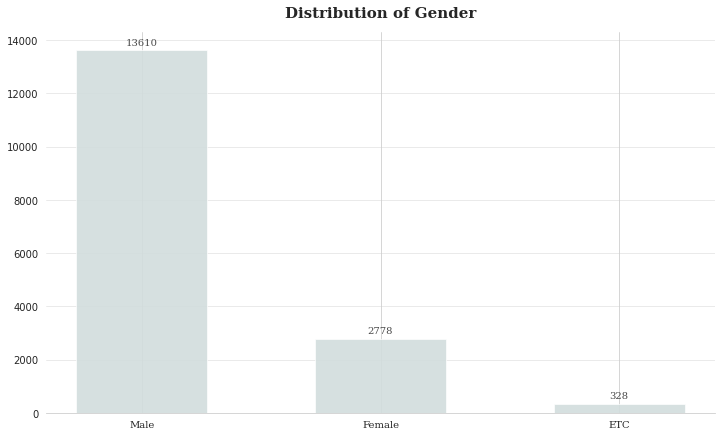

In [ ]:
fig, ax = plt.subplots(figsize=(12,7))
ax.bar(data_gender.index, data_gender, color='#d2dddd', width=.55, linewidth=.7, alpha=.9)

for i in data_gender.index:
  ax.annotate(data_gender[i], xy=(i, data_gender[i] + 300), va='center', ha='center', color='#4a4a4a', fontfamily='serif')

for s in ['top', 'left', 'right']:
  ax.spines[s].set_visible(False)

ax.set_xticklabels(data_gender.index, fontsize=10, fontfamily='serif')
ax.set_title('Distribution of Gender', fontsize=15, pad=15, fontweight='bold', fontfamily='serif')
ax.grid(axis='y', linestyle='-', alpha=0.5)

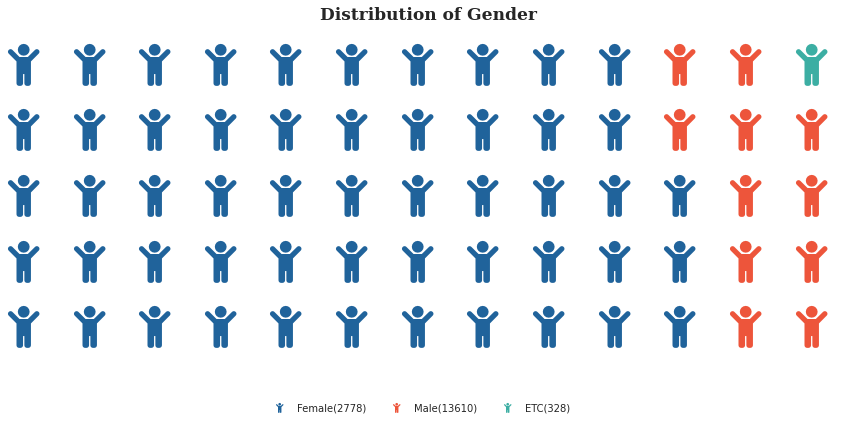

In [42]:
fig = plt.figure(
    FigureClass = Waffle,
    rows = 5,
    columns = 13,
    values = data_gender,
    icons='child',
    colors = ('#20639B', '#ED553B', '#3CAEA3'),
    title={'label':'Distribution of Gender', 'loc':'center', 'fontsize':17, 'fontweight':'bold', 'fontfamily':'serif'},
    labels={f'{a}({b})' for a,b in zip(data_gender.index, data_gender)},
    legend={'loc':'lower left', 'bbox_to_anchor':(.3,-0.25), 'ncol':len(data_gender.index), 'framealpha':0},
    figsize=(12,6),
    icon_legend = True
)
## Waffle로 만든 남녀 비율 시각화

Text(0.5, 1.0, 'Country distibution of gender')

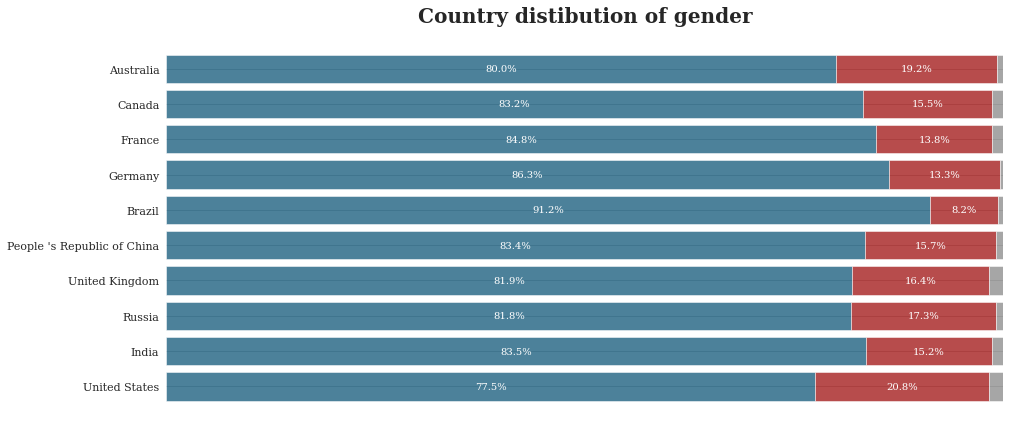

In [ ]:
countrytop10 = data_copy['Country'].value_counts()[:11].drop(['Other'], axis=0).index
data_c_g = data_copy.groupby('Country')['GenderSelect'].value_counts(normalize=True).unstack().loc[countrytop10]
## 나라와 성별을 그룹바이 한 변수 <== data_c_g

fig, ax = plt.subplots(figsize=(15,7))
ax.barh(data_c_g.index, data_c_g['Male'], color='#004c70', linewidth=.7, alpha=.7)
ax.barh(data_c_g.index, data_c_g['Female'], color='#990000', linewidth=.7, left=data_c_g['Male'], alpha=.7)
ax.barh(data_c_g.index, data_c_g['ETC'], color='gray', linewidth=.7, left=data_c_g['Male'] + data_c_g['Female'], alpha=.7)

ax.set_xlim(0,1)
ax.set_xticks([])

for i in data_c_g['Male'].index:
  ax.annotate(f"{round(data_c_g['Male'][i]*100, 1)}%", xy=(data_c_g['Male'][i]/2, i), ha='center', va='center', color='w', fontweight='light', fontfamily='serif')
for i in data_c_g['Female'].index:
  ax.annotate(f"{round(data_c_g['Female'][i]*100, 1)}%", xy=(data_c_g['Male'][i] + data_c_g['Female'][i]/2, i), ha='center', va='center', color='w', fontweight='light', fontfamily='serif')

for s in ['top', 'left', 'right', 'bottom']:
  ax.spines[s].set_visible(False)

ax.set_yticklabels(data_c_g.index, fontfamily='serif', fontsize=11)
ax.set_title('Country distibution of gender', fontsize=20, pad=15, fontweight='bold', fontfamily='serif')

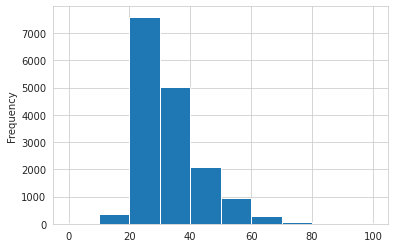

In [ ]:
data_copy.Age.plot.hist()
## 대부분 20~60세이다
## 나이 카테고리를 만들건데 10-20,20-30,...식으로 만들겠다.

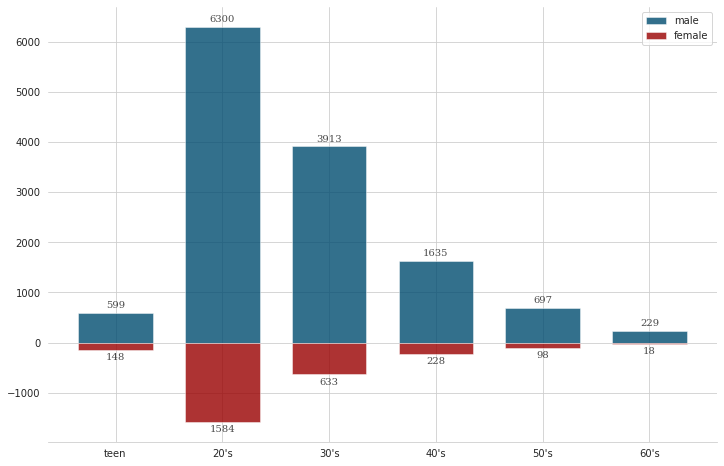

In [25]:
agelabel = ['teen', "20's", "30's", "40's", "50's", "60's"]
data_copy['Age_cut'] = pd.cut(data_copy.Age, bins=np.linspace(10,70, num=7), labels=agelabel)
data_ag = data_copy.groupby('Age_cut')['GenderSelect'].value_counts().unstack()
male = data_ag['Male']
female = -data_ag['Female']

fig, ax = plt.subplots(figsize=(12,8))
ax.bar(male.index, male, color='#004c70', alpha=.8, linewidth=.55, width=.7)
ax.bar(female.index, female, color='#990000', alpha=.8, linewidth=.55, width=.7)

for i in male.index:
  ax.annotate(male[i], xy=(i, male[i] + 150), va='center', ha='center', fontweight='light', fontfamily='serif', color='#4a4a4a')

for i in female.index:
  ax.annotate(-female[i], xy=(i, female[i] - 150), va='center', ha='center', fontweight='light', fontfamily='serif', color='#4a4a4a')

for s in ['top', 'left', 'right']:
  ax.spines[s].set_visible(False)

legend_text_g = {'male':'male', 'female':'female'}
ax.legend(legend_text_g)

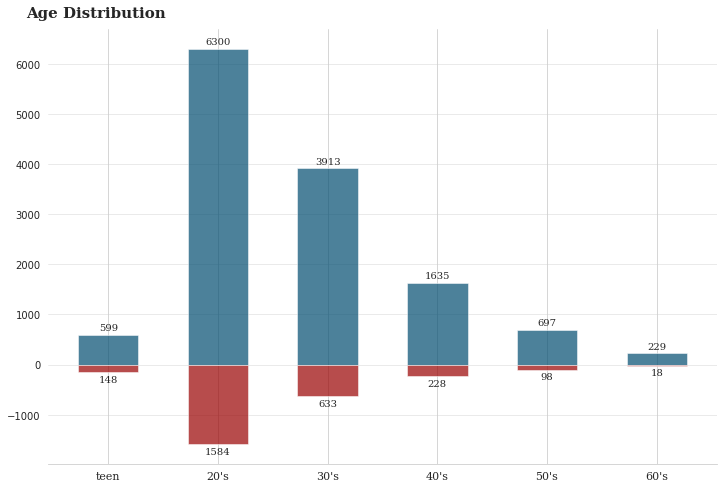

In [ ]:
agelabel = ['teen', "20's", "30's", "40's", "50's", "60's"] ## 카테고리를 string으로 바꿀수있다.
data_copy['Age_cut'] = pd.cut(data_copy.Age, bins=np.linspace(10,70, num=7), labels=agelabel)
## pd.cut을 사용해 나이 카테고리를 생성
data_ag = data_copy.groupby('Age_cut')['GenderSelect'].value_counts().unstack()
male = data_ag['Male']
female = -data_ag['Female']
## barplot으로 만들기위한 변수들

fig, ax = plt.subplots(figsize=(12,8))
ax.bar(male.index, male, width=.55, linewidth=.7, color='#004c70', alpha=.7)
ax.bar(female.index, female, width=.55, linewidth=.7, color='#990000', alpha=.7)

for i in male.index:
  ax.annotate(male[i], xy=(i, male[i] + 130), va='center', ha='center', fontfamily='serif')
for i in female.index:
  ax.annotate(-female[i], xy=(i, female[i] - 150), va='center', ha='center', fontfamily='serif')

for s in ['top', 'left', 'right']:
  ax.spines[s].set_visible(False)

ax.set_xticklabels(male.index, fontfamily='serif', fontsize=11)
fig.text(0.1, 0.9, 'Age Distribution', fontsize=15, fontweight='bold', fontfamily='serif')
ax.grid(axis='y', linestyle='-', alpha=0.5) ## 그리드 크기 바꾸기

# 직업분포와 그에따른 시각화를 실시

[Text(0, 0, 'Data Scientist'),
 Text(0, 0, 'Software Developer/Software Engineer'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'Data Analyst'),
 Text(0, 0, 'Scientist/Researcher'),
 Text(0, 0, 'Business Analyst'),
 Text(0, 0, 'Researcher'),
 Text(0, 0, 'Machine Learning Engineer'),
 Text(0, 0, 'Engineer'),
 Text(0, 0, 'Programmer'),
 Text(0, 0, 'Computer Scientist'),
 Text(0, 0, 'Statistician'),
 Text(0, 0, 'DBA/Database Engineer'),
 Text(0, 0, 'Predictive Modeler'),
 Text(0, 0, 'Data Miner'),
 Text(0, 0, 'Operations Research Practitioner')]

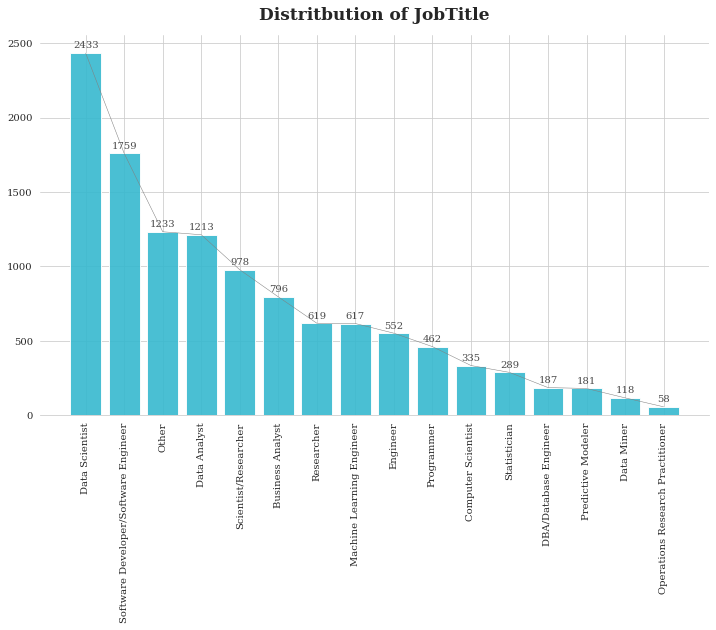

In [ ]:
fig, ax= plt.subplots(figsize=(12,7))
ax.bar(data_copy.CurrentJobTitleSelect.value_counts().index, data_copy.CurrentJobTitleSelect.value_counts(), color='#36B8CF', alpha=.9)
ax.plot(data_copy.CurrentJobTitleSelect.value_counts(), c='k', linewidth=.5, color='grey')

for i in ['top', 'left', 'right']:
  ax.spines[i].set_visible(False)

for i in data_copy.CurrentJobTitleSelect.value_counts().index:
  ax.annotate(data_copy.CurrentJobTitleSelect.value_counts()[i], xy=(i, data_copy.CurrentJobTitleSelect.value_counts()[i] + 50), va='center', ha='center', color='#4a4a4a', fontfamily='serif',
              fontweight='light')

ax.set_title('Distritbution of JobTitle', fontsize=17, fontweight='bold', fontfamily='serif', pad=15)
ax.set_yticklabels(range(0,2600,500),fontfamily='serif')
ax.set_xticklabels(data_copy.CurrentJobTitleSelect.value_counts().index, rotation=90, fontfamily='serif')

# 그렇다면 직업별로 직업만족도는 어떨까??

CurrentJobTitleSelect 컬럼과 TitleFit 컬럼을 groupby 시킨다.

[Text(0, 0, 'Business Analyst'),
 Text(0, 0, 'Computer Scientist'),
 Text(0, 0, 'DBA/Database Engineer'),
 Text(0, 0, 'Data Analyst'),
 Text(0, 0, 'Data Miner'),
 Text(0, 0, 'Data Scientist'),
 Text(0, 0, 'Engineer'),
 Text(0, 0, 'Machine Learning Engineer'),
 Text(0, 0, 'Operations Research Practitioner'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'Predictive Modeler'),
 Text(0, 0, 'Programmer'),
 Text(0, 0, 'Researcher'),
 Text(0, 0, 'Scientist/Researcher'),
 Text(0, 0, 'Software Developer/Software Engineer'),
 Text(0, 0, 'Statistician')]

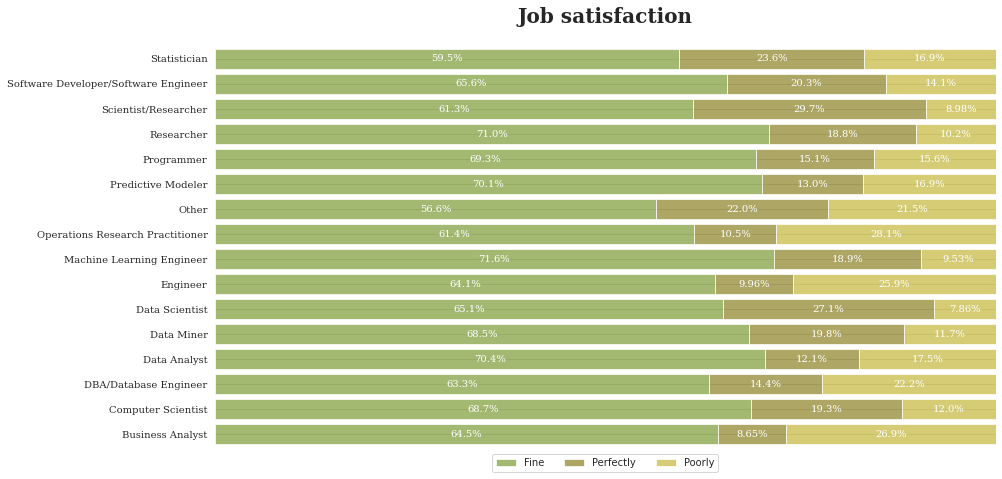

In [ ]:
data_jf = data_copy.groupby('CurrentJobTitleSelect')['TitleFit'].value_counts(normalize=True).unstack()[['Perfectly', 'Fine', 'Poorly']]
## data_jl ==> 'CurrentJobTitleSelect','TitleFit'를 그룹바이한 변수 (% 화까지 시켰다.분포-normalize)
fig, ax = plt.subplots(figsize=(14,8))
ax.barh(data_jf.index, data_jf['Fine'], color='#7D9C36', alpha=.7)
ax.barh(data_jf.index, data_jf['Perfectly'], color='#8A8024', left=data_jf['Fine'], alpha=.7)
ax.barh(data_jf.index, data_jf['Poorly'], color='#C4B73B', left=data_jf['Fine']+data_jf['Perfectly'], alpha=.7)

for x in ['top', 'bottom', 'left', 'right']:
  ax.spines[x].set_visible(False)

for i in data_jf['Fine'].index:
  ax.annotate(f"{data_jf['Fine'][i]*100:.3}%", xy=(data_jf['Fine'][i]/2, i), ha='center', va='center', color='w', fontweight='light', fontfamily='serif')

for i in data_jf['Perfectly'].index:
  ax.annotate(f"{data_jf['Perfectly'][i]*100:.3}%", xy=(data_jf['Fine'][i] + data_jf['Perfectly'][i]/2, i), ha='center', va='center', color='w', fontweight='light', fontfamily='serif')

for i in data_jf['Poorly'].index:
  ax.annotate(f"{data_jf['Poorly'][i]*100:.3}%", xy=(data_jf['Fine'][i] + data_jf['Perfectly'][i] + data_jf['Poorly'][i]/2, i), ha='center', va='center', color='w', fontweight='light', fontfamily='serif')

ax.set_xlim([0,1])
ax.set_xticks([])
legend_text = {'Fine':'fine', 'Perfectly':'perfectly', 'Poorly':'poorly'}
ax.legend(legend_text, loc='lower center', ncol=3, bbox_to_anchor=(.5, -0.03))
ax.set_title('Job satisfaction', fontsize=20, fontfamily='serif', fontweight='bold')
ax.set_yticklabels(data_jf.index, fontfamily='serif')

# 직업 만족도 시각화 완료

각 직업 만족도가 괜찮다는(Fine)이 과반수를 차지한다.

하지만 Operations Research Practitioner, Engineer, Business Analyst는 불만족도가 높은편이다.

> 이직률이 높나??



# 직업별 추천하는 프로그래밍 언어

사용한 시각화도구 ==> px.histogram()

In [6]:
data_1 = data_copy[['CurrentJobTitleSelect', 'LanguageRecommendationSelect']]
data_1
## data_1 ==> job과 language 데이터를 저장한 변수

,CurrentJobTitleSelect,LanguageRecommendationSelect
0,DBA/Database Engineer,F#
1,NaN,Python
2,NaN,R
3,Operations Research Practitioner,Python
4,Computer Scientist,Python
...,...,...
16711,NaN,NaN
16712,Programmer,Python
16713,NaN,NaN
16714,NaN,NaN


In [56]:
px.histogram(data_frame=data_1.dropna(), x='CurrentJobTitleSelect', color='LanguageRecommendationSelect', template='ggplot2')
## data_1.dropna()를 했기 때문에 데이터 자체 숫자는 크게 줄었다.(한가지라도 Null값이면 drop이기 때문에)

In [11]:
data_cl1 = data_1.groupby('CurrentJobTitleSelect')['LanguageRecommendationSelect'].value_counts().reset_index(name='count')
data_cl1
## data_cl1 ==> 직업별 추천하는 프로그래밍 언어를 value_counts()하고 reset_index()를 했다.
## ==> px.sunburst()를 하기위함

,CurrentJobTitleSelect,LanguageRecommendationSelect,count
0,Business Analyst,Python,272
1,Business Analyst,R,189
2,Business Analyst,SQL,51
3,Business Analyst,C/C++/C#,8
4,Business Analyst,SAS,8
...,...,...,...
158,Statistician,C/C++/C#,3
159,Statistician,Scala,2
160,Statistician,F#,1
161,Statistician,Java,1


In [10]:
fig = px.sunburst(data_cl1, path=['CurrentJobTitleSelect', 'LanguageRecommendationSelect'], values='count')
fig.update_layout()

In [63]:
j_c = data_1.groupby('CurrentJobTitleSelect').count()
## CurrentJobTitleSelect를 카운트한것 ==> 직업별 사용가능한 프로그래밍 언어

In [77]:
data_cl = data_1.groupby('CurrentJobTitleSelect')['LanguageRecommendationSelect'].value_counts().unstack().fillna(0).astype(int)
data_cl = pd.concat([data_cl, j_c], axis=1)
data_cl

,C/C++/C#,F#,Haskell,Java,Julia,Matlab,Other,Python,R,SAS,SQL,Scala,Stata,LanguageRecommendationSelect
CurrentJobTitleSelect,,,,,,,,,,,,,,
Business Analyst,8,0,0,3,0,5,3,272,189,8,51,5,0,544
Computer Scientist,12,0,1,4,1,10,2,155,28,0,1,3,0,217
DBA/Database Engineer,5,1,0,2,0,1,1,71,31,2,17,2,0,133
Data Analyst,12,0,0,9,0,8,8,382,288,10,69,9,2,797
Data Miner,2,0,0,0,0,3,0,37,29,0,2,1,0,74
Data Scientist,15,0,2,11,5,9,9,1203,481,12,59,19,1,1826
Engineer,16,0,2,1,0,18,4,251,62,1,10,4,1,370
Machine Learning Engineer,12,0,2,3,2,14,2,350,30,0,8,6,1,430
Operations Research Practitioner,1,0,0,0,0,1,0,12,20,0,3,0,1,38


# 배우기 유용한 플랫폼 value_counts() 를 시각화

In [ ]:
learning_platform_text = [x for x in data_copy.columns if x.find('LearningPlatform') != -1]  ## 제목 뽑아내기

In [ ]:
learning_platform_text.remove('LearningPlatformSelect')

In [ ]:
## 이 사용법 외우자!!! 유용할 듯
learning_platform = {}   ## 딕셔너리를 사용해 각 제목별로 값을 담는다.
for i in learning_platform_text:
  a = data_copy[i].value_counts()
  learning_platform[i[len('LearningPlatform'):]] = a

learning_platform = pd.DataFrame(learning_platform).T

In [ ]:
learning_platform['Sum'] = learning_platform.sum(axis=1) ## 열 합계
learning_platform = learning_platform.sort_values(by='Sum', ascending=False)
learning_platform

,Not Useful,Somewhat useful,Very useful,Sum
UsefulnessKaggle,56,2451,4076,6583
UsefulnessCourses,47,1750,4195,5992
UsefulnessSO,64,2044,3532,5640
UsefulnessYouTube,104,2605,2520,5229
UsefulnessProjects,39,1185,3570,4794
UsefulnessBlogs,45,2406,2314,4765
UsefulnessTextbook,69,1796,2316,4181
UsefulnessCollege,101,1405,1853,3359
UsefulnessArxiv,37,1038,1316,2391
UsefulnessDocumentation,42,1067,1212,2321


In [ ]:
learning_platform_sum = learning_platform.sum(axis=0).drop(['Sum']) ## 행 합계
learning_platform_sum

Not Useful          1052
Somewhat useful    23130
Very useful        31021
dtype: int64

In [ ]:
from matplotlib.gridspec import GridSpec
learning_platform = learning_platform.drop(['PlatformSum'])

Text(0.5, 1.0, 'Pie Plot')

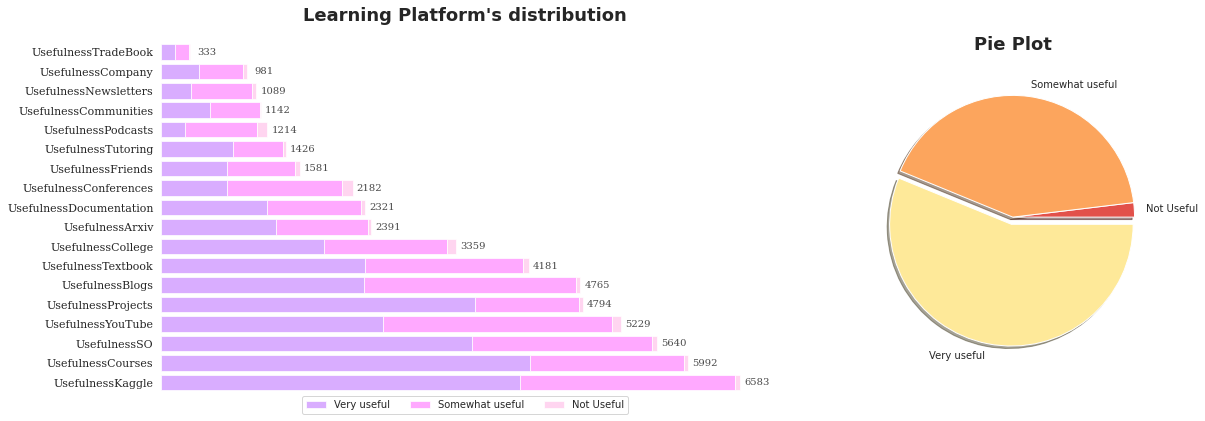

In [ ]:
gs = GridSpec(nrows=1, ncols=2, width_ratios=[80,40], height_ratios=[10])
fig = plt.subplots(figsize=(18,7))
ax = plt.subplot(gs[0])
ax.barh(learning_platform.index, learning_platform['Very useful'], color='#C98AFF', alpha=.7)
ax.barh(learning_platform.index, learning_platform['Somewhat useful'], left=learning_platform['Very useful'], color='#FF85FF', alpha=.7)
ax.barh(learning_platform.index, learning_platform['Not Useful'], left=learning_platform['Very useful'] + learning_platform['Somewhat useful'], color='#FFC4EB', alpha=.7)

for i in learning_platform.index:
  ax.annotate(learning_platform['Sum'][i], xy=(learning_platform['Sum'][i] + 190, i), color='#4a4a4a',va='center', ha='center', fontfamily='serif', fontweight='light')

for i in ['top', 'left', 'right', 'bottom']:
  ax.spines[i].set_visible(False)

ax.set_xticks([])
ax.set_yticklabels(learning_platform.index, fontfamily='serif', fontsize=11)
ax.set_title("Learning Platform's distribution", fontweight='bold', fontsize=18)

legend_text_lp = {'Very useful':'Very useful', 'Somewhat useful':'Somewhat useful', 'Not Useful':'Not Useful'}
ax.legend(legend_text_lp, loc='lower center', ncol=3, bbox_to_anchor=(.5, -0.03))
ax.grid(False)  ## grid 숨기기

ax1 = plt.subplot(gs[1])
ax1.pie(learning_platform_sum, labels=learning_platform_sum.index, shadow=True, startangle=0, explode=[0, 0, 0.06], colors=sns.color_palette('Spectral'))
ax1.set_title('Pie Plot', fontsize=18, fontweight='bold', pad=15)

In [ ]:
data_copy.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,PublicDatasetsSelect,LearningPlatformSelect,LearningPlatformUsefulnessArxiv,LearningPlatformUsefulnessBlogs,LearningPlatformUsefulnessCollege,LearningPlatformUsefulnessCompany,LearningPlatformUsefulnessConferences,LearningPlatformUsefulnessFriends,LearningPlatformUsefulnessKaggle,LearningPlatformUsefulnessNewsletters,LearningPlatformUsefulnessCommunities,LearningPlatformUsefulnessDocumentation,LearningPlatformUsefulnessCourses,LearningPlatformUsefulnessProjects,LearningPlatformUsefulnessPodcasts,LearningPlatformUsefulnessSO,LearningPlatformUsefulnessTextbook,LearningPlatformUsefulnessTradeBook,LearningPlatformUsefulnessTutoring,LearningPlatformUsefulnessYouTube,BlogsPodcastsNewslettersSelect,LearningDataScienceTime,JobSkillImportanceBigData,JobSkillImportanceDegree,JobSkillImportanceStats,JobSkillImportanceEnterpriseTools,...,WorkChallengeFrequencyITCoordination,WorkChallengeFrequencyHiringFunds,WorkChallengeFrequencyPrivacy,WorkChallengeFrequencyScaling,WorkChallengeFrequencyEnvironments,WorkChallengeFrequencyClarity,WorkChallengeFrequencyDataAccess,WorkChallengeFrequencyOtherSelect,WorkDataVisualizations,WorkInternalVsExternalTools,WorkMLTeamSeatSelect,WorkDatasets,WorkDatasetsChallenge,WorkDataStorage,WorkDataSharing,WorkDataSourcing,WorkCodeSharing,RemoteWork,CompensationAmount,CompensationCurrency,SalaryChange,JobSatisfaction,JobSearchResource,JobHuntTime,JobFactorLearning,JobFactorSalary,JobFactorOffice,JobFactorLanguages,JobFactorCommute,JobFactorManagement,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,Employed by a company that doesn't perform adv...,SAS Base,Random Forests,F#,Dataset aggregator/platform (i.e. Socrata/Kagg...,"College/University,Conferences,Podcasts,Trade ...",NaN,NaN,NaN,NaN,Very useful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very useful,NaN,NaN,Somewhat useful,NaN,NaN,"Becoming a Data Scientist Podcast,Data Machina...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Often,Most of the time,NaN,NaN,NaN,NaN,26-50% of projects,Do not know,Standalone Team,NaN,NaN,Document-oriented (e.g. MongoDB/Elasticsearch)...,"Company Developed Platform,I don't typically s...",NaN,"Mercurial,Subversion,Other",Always,NaN,NaN,I am not currently employed,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,Random Forests,Python,Dataset aggregator/platform (i.e. Socrata/Kagg...,Kaggle,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat useful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Becoming a Data Scientist Podcast,Siraj Raval ...",1-2 years,NaN,Nice to have,Unnecessary,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Amazon Web services,Deep learning,R,Dataset aggregator/platform (i.e. Socrata/Kagg...,"Arxiv,College/University,Kaggle,Online courses...",Very useful,NaN,Somewhat useful,NaN,NaN,NaN,Somewhat useful,NaN,NaN,NaN,Very useful,NaN,NaN,NaN,NaN,NaN,NaN,Very useful,"FastML Blog,No Free Hunch Blog,Talking Machine...",1-2 years,Necessary,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Asking friends, family members, or former coll...",1-2,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Impor

In [ ]:
## 마저 데이터 핸들링과 시각화 더하기